<a href="https://colab.research.google.com/github/wajidhabib/find-noisy-pixel-in-image/blob/main/finding_noisy_pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

original image


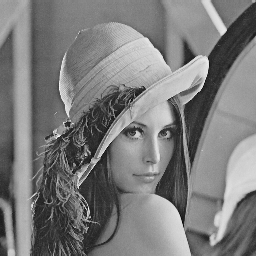

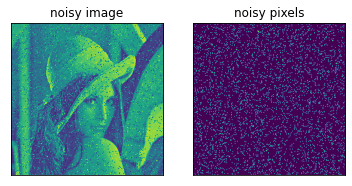

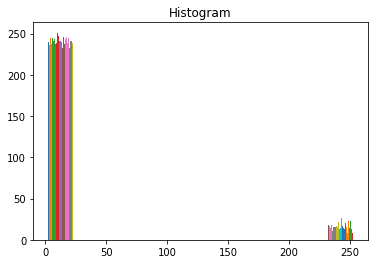

In [ ]:
"""
A program to find the noisy pixel by comparing with the original image
| Program reads a gray scale image, 
| Adds noise to image
| Finds the noisy pixel by compring the each pixel of the noisy and original pixel;
  if pixel is noisy sets its value 255 otherwise assigns it 0
| Displays noisy picture and Histogram
"""

import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

import numpy as np
import random
 
def add_noise(image, prob):
    """ function to add noise

    Args:
        image (Image): Gray Scale image for adding noise
        prob (float): probablity of the noise less than 1 in float form like 0.3, 0.5 etc.

    Returns:
        Image: Image with added noise
    """
    #image=cv2.imread(image,0)
           
    output= np.zeros(image.shape, np.uint8)

    threshold = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            rnd=random.random()
            if rnd <prob:
                output[i][j]=0
            elif rnd>threshold:
                output[i][j] = 255
            else:
                output[i][j]=image[i][j]
    
    return output

#1. Load Image
img_gray=cv2.imread('/content/drive/MyDrive/ImageProcessing/images/Lenna_gray.png',0)

#2. Show orginal Image
print("original image")
cv2_imshow(img_gray)
#3. add 3% noise to image
img_noisy= add_noise(img_gray,0.03)

#4. Compare images
output= np.zeros(img_noisy.shape,np.uint8)
window=np.zeros(img_gray.shape,np.uint8)

for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
      
        if img_gray[i][j] == img_noisy[i][j]: #image is okay          
            window[i][j]=0
        else: # image is noisy
           window[i][j]=255

#5. Show resutls        
plt.subplot(121),plt.imshow(img_noisy),plt.title('noisy image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(window),plt.title('noisy pixels')
plt.xticks([]), plt.yticks([])
 
plt.show()

plt.title('Histogram')
plt.hist(window,bins=10)
plt.show()



# New Section